<a href="https://colab.research.google.com/github/voke-brume/AI-ML/blob/main/AI/ComputerVision/TwoDThreeD/2D3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from typing import List
def drawlines(img1, img2, lines, pts1, pts2):
    r, c = img1.shape
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2


def draw_epipolar(img1, img2, F, pts1, pts2):
    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
    lines1 = lines1.reshape(-1, 3)
    img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
    lines2 = lines2.reshape(-1, 3)
    img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

    plt.subplot(121)
    plt.imshow(img5)
    plt.subplot(122)
    plt.imshow(img3)
    plt.show()


def visualize_pcd(points):
    """
    Visualize the point cloud.
    """
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(points)
    # Uncommend this line if you want to paint some color
    # pcd.paint_uniform_color([0, 0, 1])
    open3d.visualization.draw_geometries([pcd])

def extract_points(point_file):
  """
  Function to extract points from text files

  Input: point_file
  Output: array
  """
  # Declare empty array
  list_of_values = []

  # Open file
  file = open(point_file)

  # Loop through file
  for line in file:
    # Split values and append them to array
    list_of_values.append([float(x) for x in line.split()])

  # Return array
  return np.array(list_of_values)

# 1. Camera Calibration

The goal is to compute the projection matrix $P$ that goes from world 3D coordinates to 2D image coordi-nates. Recall that using homogeneous coordinates the equation for moving from 3D world to 2D camera coordinates is:

\begin{align}
\begin{pmatrix}
u\\
v\\
1
\end{pmatrix} \equiv P \begin{pmatrix} X \\ Y \\ Z \\ 1 \end{pmatrix}
\end{align}

In [ ]:
# Save array of 2D and 3D points
points_2D = extract_points('/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment3/assignment3/Data/pts2d-norm-pic.txt')
points_3D = extract_points('/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment3/assignment3/Data/pts3d-norm.txt')

In [ ]:
# TODO: Complete the function below

'''
For given a given set of 2D and 3D points, calculate the projection matrix and return it.
'''
def ProjectionMatrixCalc(two2D,Three3D):
  # Save row size of either points array since they are equal
  size = len(Three3D)

  # Variable to save m_3x4 values
  matrix_values = np.zeros((size*2, 12)) 
  
  # Loop through to add linear model into matrix_values
  for i in range(size):
    # Declare respective values for variables u, v, X, Y, and Z 
    # from point files two2D and Three3D
    u = two2D[i, 0]
    v = two2D[i, 1]
    X = Three3D[i, 0]
    Y = Three3D[i, 1]
    Z = Three3D[i, 2]

    # Add linear model into matrix array of zeros
    matrix_values[i*2, :] = [X, Y, Z, 1, 0, 0, 0, 0, -(u*X), -(u*Y), -(u*Z), -u]
    matrix_values[ (i*2)+1, : ] = [0, 0, 0, 0, X, Y, Z, 1, -(v*X), -(v*Y), -(v*Z), -v]

  # Finding the least squares solution on all 20 pairs
  # using singular value decomposition(SVD)
  u, s, vh = np.linalg.svd(matrix_values)

  # P is last row since vh is in descending order
  # Reshape P to P_3x4
  P = vh[-1, :].reshape((3, 4))
  
  # Return projection matrix
  return P

In [ ]:
# Call function on points data to compute projection matrix
ProjectionMatrixCalc(points_2D, points_3D)

array([[ 0.45827554, -0.29474237, -0.01395746,  0.0040258 ],
       [-0.05085589, -0.0545847 , -0.54105993, -0.05237592],
       [ 0.10900958,  0.17834548, -0.04426782,  0.5968205 ]])

*Answer*

\begin{align}
\begin{pmatrix}
u\\
v\\
1
\end{pmatrix} \equiv P \begin{pmatrix} X \\ Y \\ Z \\ 1 \end{pmatrix}
\end{align}


=> Where 
\begin{align}  
P = 
\begin{pmatrix} 
p_1 & p_2 & p_3 & p_4 \\
p_5 & p_6 & p_7 & p_8 \\ 
p_9 & p_{10} & p_{11} & p_{12} 
\end{pmatrix}
\end{align}

=> Therefore, 
\begin{align}
\begin{pmatrix}
u\\
v\\
1
\end{pmatrix} = 
\begin{pmatrix} 
p_1 & p_2 & p_3 & p_4 \\
p_5 & p_6 & p_7 & p_8 \\ 
p_9 & p_{10} & p_{11} & p_{12} 
\end{pmatrix} 
\begin{pmatrix} X \\ Y \\ Z \\ 1 \end{pmatrix}
\end{align}

Solving for u and v,
\begin{align}
        u = \frac{p_{1}X +p_{2}Y+p_{3}Z+p_{4}}{p_9X +p_{10}Y+p_{11}Z+p_{12}}\end{align}

\begin{align}
        v = \frac{p_{5}X +p_{6}Y+p_{7}Z+p_{8}}{p_9X +p_{10}Y+p_{11}Z+p_{12}}\end{align}

Therefore,
\begin{align}
        p_{1}X +p_{2}Y+p_{3}Z+p_{4}-p_9uX -p_{10}uY-p_{11}uZ-p_{12}u = 0
\end{align}
\begin{align}
        p_{5}X +p_{6}Y+p_{7}Z+p_{8}-p_9vX -p_{10}vY-p_{11}vZ-p_{12}v = 0
\end{align}

Using this,
\begin{align}
P = 
\begin{pmatrix} 
0.45827554 & -0.29474237 & -0.01395746 & 0.0040258\\
-0.05085589 & -0.0545847 & -0.54105993 & -0.05237592 \\ 
0.10900958 & 0.17834548 & -0.04426782 & 0.5968205 
\end{pmatrix}
\end{align}






# 2. Estimation of Fundamental Matrix

Recall that the definition of the Fundamental Matrix is:

\begin{align}
\begin{pmatrix}
u' & v' & 1
\end{pmatrix} \begin{pmatrix} f_{11} & f_{12} & f_{13} \\ f_{21} & f_{22} & f_{23} \\ f_{31} & f_{32} & f_{33} \end{pmatrix} \begin{pmatrix} u \\ v \\ 1 \end{pmatrix} = 0
\end{align}

Note: the fundamental matrix is sometimes defined as the transpose of the above matrix with the left and right image points swapped. Both are valid fundamental matrices, but the visualization functions in the helper methods assume you use the above form.

And another way of writing this matrix equations is:

\begin{align}
\begin{pmatrix}
u' & v' & 1
\end{pmatrix} \begin{pmatrix} f_{11}u + f_{12}v + f_{13} \\ f_{21}u + f_{22}v + f_{23} \\ f_{31}u + f_{32}v + f_{33} \end{pmatrix} = 0
\end{align}


Which is same as:

\begin{align}
f_{11}uu' + f_{12}vu' + f_{13}u' + f_{21}uv' + f_{22}vv' + f_{23}v' + f_{31}u + f_{32}v + f_{33} = 0
\end{align}

Given corresponding points you get one equation per point pair. Therefore, you can solve this with 8 or more points by constructing a system

\begin{align}
Af = 0
\end{align}

where

\begin{align}
f = \begin{bmatrix} f_{11}, f_{12}, f_{13}, f_{21}, f_{22}, f_{23}, f_{31}, f_{32}, f_{33} \end{bmatrix}^T
\end{align}

and you can use SVD to solve it.

In [ ]:
# Load corresponding points from temple.npz
temple_points = np.load('/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment3/assignment3/Data/temple.npz')
_, _, points_1, points_2= [temple_points[i] for i in temple_points.keys()]

# Loading the images into grayscale
img1 =  cv2.imread("/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment3/assignment3/Data/im1.png")[:,:,0]
img2 = cv2.imread("/content/drive/Othercomputers/myPCWindows/schoolStuff [D]/CS678/assignment3/assignment3/Data/im2.png")[:,:,0]

In [ ]:
'''
Implement eight-point algorithm and estimate the fundamental matrix F. Print out F below as well.
Remember to normalize F so that the last entry of F is 1. Hint: You may find it helpful to normalize
the data first. For example, scale the data by dividing each coordinate by the maximum of the images
width and height.
'''
def eightPointAlg(points_1, points_2, normalize=False): # Feel free to add as many input arguments as you like.
  # Convert points data to homogenous coordinates (x, y, 1)
  points_1 = np.concatenate( (points_1,np.ones((len(points_1),1)) ), axis = 1)
  points_2 = np.concatenate( (points_2,np.ones((len(points_2),1)) ), axis = 1)

  # Function to normalize data
  def normalize_point_data(points_data):
    # Calculate mean of points
    points_mean = np.mean(points_data, axis=0)
    # Subtract mean-squared from each point coordinate to center image at origin
    points_squared = np.square( points_data - points_mean * np.ones(points_data.shape) )
    # Scale mean-squared distance
    points_std = np.mean( np.sqrt(points_squared[:, 0] + points_squared[:, 1]) )
    # Calculate translation and scaled matrix of points data
    T_1 = np.array([[1, 0, -points_mean[0]], [0, 1, -points_mean[1]], [0, 0, 1]])
    T_2 = np.array([[np.sqrt(2) / points_std, 0, 0], [0, np.sqrt(2) / points_std, 0], [0, 0, 1]])
    T_1_2 = np.dot(T_2, T_1)
    # Return translated points and translation matrix for points data
    return np.dot(T_1_2, points_data.T).T, T_1_2

  # Call normalization function on each point data
  if normalize == True:
    points_1, T_a_b_points_1 = normalize_point_data(points_1)
    points_2, T_a_b_points_2 = normalize_point_data(points_2)

  # Save row size of either points array since they are equal
  size = len(points_1)

  # Variable to save linear model values
  matrix_values = np.zeros((size, 9)) 
  
  # Loop through to add linear model into matrix_values
  for i in range(size):
    u_pts1 = points_1[i][0]
    v_pts1 = points_1[i][1]
    u_pts2 = points_2[i][0]
    v_pts2 = points_2[i][1]

    # Add linear model into matrix array of zeros
    matrix_values[i,:] = [ u_pts1*u_pts2, v_pts1*u_pts2, u_pts2, u_pts1*v_pts2, v_pts1*v_pts2, v_pts2, u_pts1, v_pts1, 1 ]

  # Finding the least squares solution on all 110 linear values
  # using singular value decomposition (SVD)
  u, s, vh = np.linalg.svd(matrix_values)

  # P is last row since vh is in descending order
  # Reshape F to F_3x3
  fundamental_matrix = vh[-1].reshape(3,3)

  # Decompose F to enforce rank 2
  u, s, vh = np.linalg.svd(fundamental_matrix)

  # Change lowest value of s to 0 and use as diagonal
  # Get the dot product to recompose F
  fundamental_matrix = np.dot(u, np.dot( np.diag([*s[:2], 0]), vh) )

  # Un-normalize fundamental matrix to original units
  if normalize == True:
    fundamental_matrix = np.dot( T_a_b_points_2.T, np.dot(fundamental_matrix, T_a_b_points_1) )

  # Normalize F so last value is 1
  fundamental_matrix = fundamental_matrix/fundamental_matrix[2,2]

  # Return fundamental matrix (F)
  return fundamental_matrix

In [ ]:
# Call eight points algorithm function on points data
F= eightPointAlg(points_1, points_2, normalize=True)
F_unnormalized = eightPointAlg(points_1, points_2)

*Answer*
\begin{align}
F_{normalizedData} = 
\begin{pmatrix} 
-4.56467394e-07 &  2.43227032e-05 & 1.66715104e-04\\
1.54501891e-05 & 5.64438707e-07 & -2.35086559e-01\\ 
-4.19950968e-03 & 2.25685941e-01 & 1.00000000e+00
\end{pmatrix}
\end{align}

\begin{align}
F_{unnormalizedData} = 
\begin{pmatrix} 
2.44591102e-06 & -7.33727208e-06 & -6.68332196e-03\\
1.96055427e-05 & -1.76592341e-06 & -5.76083853e-02\\ 
-1.67888127e-03 & 5.57272560e-02 & 1.00000000e+00
\end{pmatrix}
\end{align}


Normalization reduces the matrix value while yeilding better results.

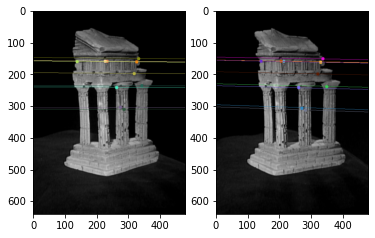

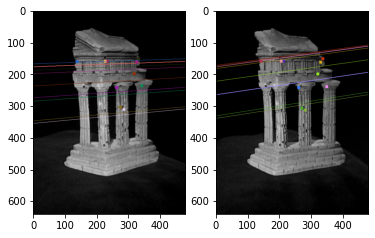

In [ ]:
# Image of first num_lines epipolar lines in points dataset
NUMBER_OF_LINES = 10
draw_epipolar(img1, img2, F, points_1[:NUMBER_OF_LINES,:], points_2[:NUMBER_OF_LINES,:])
draw_epipolar(img1, img2, F_unnormalized, points_1[:NUMBER_OF_LINES,:], points_2[:NUMBER_OF_LINES,:])

# 3 Triangulation

The next step is extracting 3D points from 2D points and camera matrices, which is called triangulation. Let $X = (X1, X2, X3, 1)^T$ be a point in 3D. For two cameras, we have

\begin{align}
x_1 = P_1X \\
x_2 = P_2X \\
\end{align}

Triangulation is to solve $X$ given $x_1, x_2, P_1, P_2$. We’ll use Direct Linear Tranform (DLT) to perform triangulation, which has already been implemented in OpenCV.

Hints:

1. Load camera intrinsic matrix $K_1$ and $K_2$ from `temple.npz`.
2. Extract the essential matrix $E$ given the fundamental matrix $F$ and intrinsic matrices $K_1$ and $K_2$. Recall that

\begin{align}
F = K_2^{-T}EK_1^{-1}
\end{align}

3. Decompose the essential matrix $E$ and get the rotation matrix $R$ and translation $t$. You can use `cv2.decomposeEssentialMat`. There are four possible combinations of R and t. The correct configuration is the one for which most of the 3D points are in front of both cameras (positive
depth).

4. Determine the camera projection matrices $P_1$ and $P_2$ according to the intrinsic and extrinsic matrix $[R|t]$, $K_1$ and $K_2$. Report $P_1$ and $P_2$. You can set

\begin{align}
P_1 = K_1 \begin{bmatrix} I & 0 \end{bmatrix} \\
P_2 = K_2 \begin{bmatrix} R & t \end{bmatrix}
\end{align}

5. Triangulate 2D pairs of points *(will be under name `pts1` and `pts2` in `temple.npz` file)* to 3D. You can use `cv2.triangulatePoints`.

6. Visualize the point cloud using `open3D`. You can use the helper method `visualize_pcd` or write your own. *Note: If displaying the projection in the colab/jupyter notebook is difficult, you may run the code in your local computer and take screenshot from 3 angles and include it in submission.*


In [ ]:
# Load camera intrinsic matrix K1 and K2
k1, k2, _, _= [temple_points[i] for i in temple_points.keys()]

In [ ]:
# TODO
def triangulation(K1, K2, F, pts_1, pts_2): # Feel free to add as many input arguments as you like.
  # Convert points data to homogenous coordinates (x, y, 1)
  pts_1 = np.concatenate( (points_1,np.ones((len(points_1),1)) ), axis = 1)
  pts_2 = np.concatenate( (points_2,np.ones((len(points_2),1)) ), axis = 1)

  def normalize_point_data(points_data):
    # Calculate mean of points
    points_mean = np.mean(points_data, axis=0)
    # Subtract mean-squared from each point coordinate
    points_squared = np.square( points_data - points_mean * np.ones(points_data.shape) )
    # Calculate total mean-squared of point coordinates combined
    points_std = np.mean( np.sqrt(points_squared[:, 0] + points_squared[:, 1]) )
    # Calculate translation and scaled matrix for matched points in points_data
    T_1 = np.array([[1, 0, -points_mean[0]], [0, 1, -points_mean[1]], [0, 0, 1]])
    T_2 = np.array([[np.sqrt(2) / points_std, 0, 0], [0, np.sqrt(2) / points_std, 0], [0, 0, 1]])
    T_1_2 = np.dot(T_2, T_1)
    # Return translated points and translation matrix for points data
    return np.dot(T_1_2, points_data.T).T, T_1_2

  # Call normalization function on each point dataser
  pts_1, T_a_b_points_1 = normalize_point_data(pts_1)
  pts_2, T_a_b_points_2 = normalize_point_data(pts_2)

  # Drop last column to get un-homogenous coordinates
  pts_1 = pts_1[:,:2]
  pts_2 = pts_2[:,:2]
    
  # Step 2: Extract essential matrix E (also report the value of E in the answer cell below)
  essential_matrix = np.dot(K2.T, np.dot(F,K1))
  # Decompose essential matrix to enforce rank 2
  u, s, vh = np.linalg.svd(essential_matrix)
  essential_matrix = np.dot(np.dot(u,np.diag([1, 1, 0])),vh)

  # Step 3: Decompose E to R and t
  R_1, R_2, t = cv2.decomposeEssentialMat(essential_matrix)

  # Four possible combination of R and t
  combo_1, combo_2, combo_3, combo_4 = [R_1,t], [R_1,-t], [R_2,t], [R_2,-t]

  # Used combo_2 because it has most positive depth
  I, zeros = np.identity(3), np.zeros((3,1))
  P1 = K1 @ (I @ np.hstack((I, zeros)))
  P2 = K2 @ (combo_2[0] @ np.hstack((I, combo_2[1])))

  # Step 5: 
  # Get 4D triangulation points using Direct Linear Tranform (DLT) internally
  X = cv2.triangulatePoints(P1, P2, pts_1.T, pts_2.T)

  # Divide coordinates x, y, z by w to get 3D points
  Z = (X[:3,:]/X[3,:])

  # Return transposed 3D points with shape N X 3
  return Z.T

In [ ]:
# Call triangulation function to generate 3D points
points_3D = triangulation(k1, k2, F, points_1, points_2)

*Answer*

\begin{align}
E = 
\begin{pmatrix} 
-2.96516471e-03 & 1.56609664e-01 & 2.58208118e-02\\
1.01447088e-01 & 4.56043170e-03 & -9.94501305e-01\\ 
-2.11606855e-03 & 9.87647809e-01 & 2.81659256e-04
\end{pmatrix}
\end{align}

*Answer*

\begin{align}
P_1 = 
\begin{pmatrix} 
1.5204e+03 & 0.0000e+00 & 3.0230e+02 & 0.0000e+00\\
0.0000e+00 & 1.5259e+03 & 2.4690e+02 & 0.0000e+00\\ 
0.0000e+00 & 0.0000e+00 & 1.0000e+00 & 0.0000e+00
\end{pmatrix}
\end{align}


\begin{align}
P_2 = 
\begin{pmatrix} 
1.39186153e+03 & -3.66057834e+01 & 6.81456482e+02 & -1.26650635e+03\\
-2.82826215e+01 & 1.52525962e+03 & 2.49226019e+02 & 2.79402812e+01\\ 
-2.56102739e-01 & -8.24379544e-04 & 9.66649216e-01 & 4.04326439e-01
\end{pmatrix}
\end{align}

In [ ]:
# 3D Visualization
fig = go.Figure(data=[go.Scatter3d(
            x=points_3D[:,0], y=points_3D[:,1], z=points_3D[:,2], 
            mode='markers', marker=dict(size=3.5, color=points_3D[:,2])
            )],
            layout=dict(scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
            ))
            )
fig.show()